In [1]:
%pylab inline
from deap import algorithms, base, creator, tools
from PIL import Image, ImageDraw

Populating the interactive namespace from numpy and matplotlib


In [2]:
dest=Image.open('simple_a.png').convert("L")
im=dest.copy()

def eval(individual):
    im=draw(individual)
    dist=sum(abs(array(dest)-array(im)))
    return dist,

In [6]:
dest.size

(256, 256)

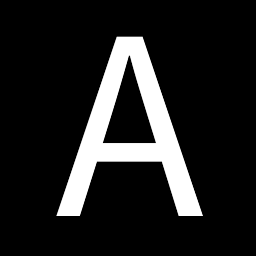

In [15]:
dest

In [3]:
def draw(individual):
    draw=ImageDraw.Draw(im)
    draw.rectangle((0,0)+im.size, fill=0)
    for X in array(individual).reshape(-1,2):
        x, y = X
        x*=im.width
        y*=im.height
        draw.ellipse([x-5, y-5, x+5, y+5], fill=255)    
    return im

In [4]:
creator.create("Minimalizator", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.Minimalizator)

In [7]:
popSize=100
indSize=2*100

In [12]:
x=uniform(0,1,indSize)

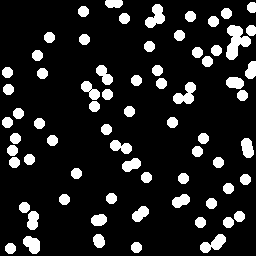

In [13]:
draw(x)

In [8]:
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_float", random.uniform, 0.1, 0.9)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, indSize)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [9]:
pop = toolbox.population(n=popSize)
hof = tools.HallOfFame(3)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [24]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, halloffame=hof, verbose=False, stats=stats)

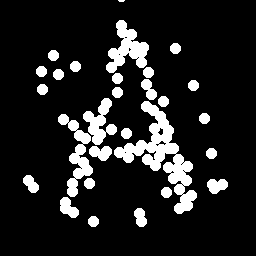

In [25]:
draw(hof[0])